## Aproksymacja funkcji

Pod pojęciem aproksymacji rozumie się przybliżanie jednej funkcji (tzw. funkcji aproksymowanej) z użyciem innej - aproksymującej. Przykłady matematycznego aparatu służącego do aproksymacji funkcji pojawiły się na przedmiotach związanych z metodami numerycznymi (aproksymacja w bazie wielomianów, funkcji trygonometrycznych, funkcjami sklejanymi,  Padego itp.).

Przypomnienie: żeby stwierdzić poprawność aproksymacji, potrzebujemy funkcji błędu, zwanej *błędem aproksymacji* i chcemy znaleźć taką funkcję *G(x)* służącą do aproksymacji *F(x)*, żeby $||G(x) - F(x)||$ było jak najmniejsze. Na potrzeby tych laboratoriów będziemy posługiwać się m.in. *błędem aproksymacji średniokwadratowej*:

$L = \int_a^b[G(x)-F(x)]^2 dx$

Możemy przybliżyć całkowanie jako sumę, bo i tak będziemy wykonywać badania dla skończonej liczby węzłów $N$:

$L = \sum_{i=1}^{N}(G_i-F_i)^2$

### Po co aproksymujemy?

Bardzo wiele zjawisk jest opisanych jakąś funkcją, o której prawdziwej postaci nie mamy pojęcia i często może ona być zbyt skomplikowana, żeby dało się ją w ogóle spróbować zapisać wprost. Takimi funkcjami może być np:

* wartość nieruchomości
* cena akcji
* ilość kliknięć klientów w aplikację
* budżet miasta
* temperatura powietrza (przewidywanie pogody)

### Czemu używamy sieci neuronowych w aproksymacji?

Aproksymacja za pomocą znanych państwu metod (np. aproksymacja w bazie funkcji trygonometrycznych) wymaga odpowiednio skomplikowanego aparatu matematycznego i najczęściej wymaga jakiejś wiedzy na temat aproksymowanej funkcji. Sieci neuronowe pozwalają dokonać aproksymacji w prostszy sposób, również w bardzo dużej liczbie wymiarów i przy bardzo skomplikowanych funkcjach.

### Dzisiejsze zajęcia

Aproksymacja danych doświadczalnych krzywymi nosi często miano nazwę **regresji**. Stąd też sieci przeznaczone do zadań regresji będą tworzone za pomocą klasy MLPRegressor.

Jeśli błąd będzie mierzony na dyskretnym zbiorze punktów   to jest to *aproksymacja punktowa*, a jeśli w przedziale  to jest to aproksymacja integralna lub przedziałowa (przypadek rzadziej spotykany).

## Przykład aproksymacji w jednym wymiarze

Na początku zobaczmy, jak sieć feed-forward poradzi sobie z aproksymacją funkcji $f(x) = 3.1sin(1.7x)+0.8cos(3.3x+2.6)+0.5cos(2.2x+0.4)+sin(6x)$

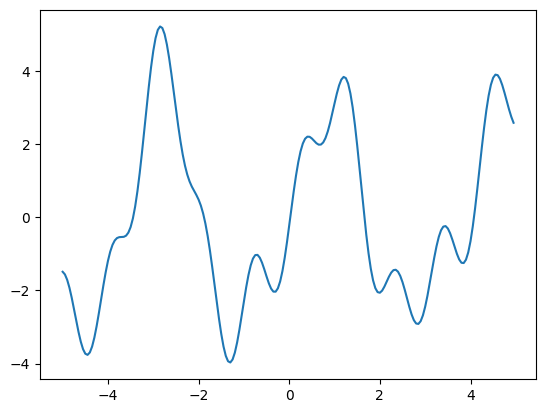

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# stwórzmy przykładową funkcję i sprawdźmy, jak poradzi sobie z nią sieć neuronowa
x = np.arange(-5,5,0.05)
y = 3.1*np.sin(1.7*x)+0.8*np.cos(3.3*x+2.6)+0.5*np.cos(2.2*x+0.4)+np.sin(6.*x)
# narysujmy tę funkcję:
plt.plot(x,y)

In [ ]:
# spróbujmy stworzyć sieć neuronową do aproksymacji tej funkcji:

# dzielimy zbiór punktów na uczące i testujące:
# musimy zrobić reshape, bo dane uczące muszą być 2-wymiarowym arrayem, nawet, jeśli jeden z tych wymiarów to 1
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1),y)

network = MLPRegressor(solver='adam',hidden_layer_sizes=(80, 80, 80, 80, 80), max_iter = 1000, tol = 0.001, activation = 'relu')

network.fit(X_train, y_train)

# uwaga, ten score to już nie jest accuracy!
network.score(X_train, y_train)

0.9503642597360207

In [ ]:
network.score(X_test, y_test)

0.9295342048693985

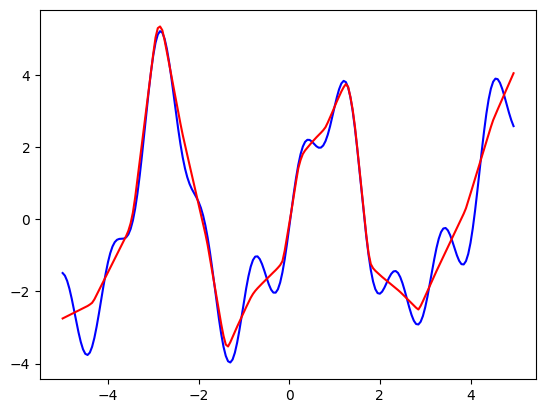

In [ ]:
# Zobaczmy jak wygląda wykres aproksymowanej funkcji i aproksymującej

y_pred = network.predict(x.reshape(-1,1))

plt.plot(x,y,'b')
plt.plot(x,y_pred,'r')
plt.show()
# widzimy, że przewidywana funkcja jest całkiem niezłym przybliżeniem tej, o którą nam chodzi

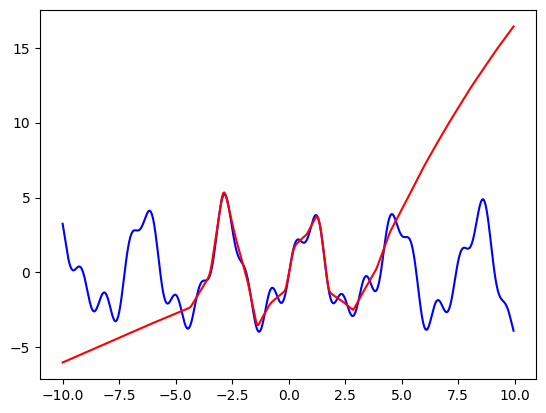

In [ ]:
# Zobaczmy co się stanie poza obszarem, który podaliśmy sieci do nauczenia
x_extended = np.arange(-10,10,0.05)
y_extended = 3.1*np.sin(1.7*x_extended)+0.8*np.cos(3.3*x_extended+2.6)+0.5*np.cos(2.2*x_extended+0.4)+np.sin(6.*x_extended)
y_predicted_extended = network.predict(x_extended.reshape(-1,1))

plt.plot(x_extended,y_extended,'b')
plt.plot(x_extended,y_predicted_extended,'r')
plt.show()
# och... co tu poszło nie tak?

Czy problem, który obserwujemy, dotyczy tylko aproksymacji przy użyciu sieci neuronowych?

## Aproksymacja na podstawie punktów

Teraz przybliżmy przykład, w którym znamy pojedyncze punkty i chcemy dopasować do nich funkcję.

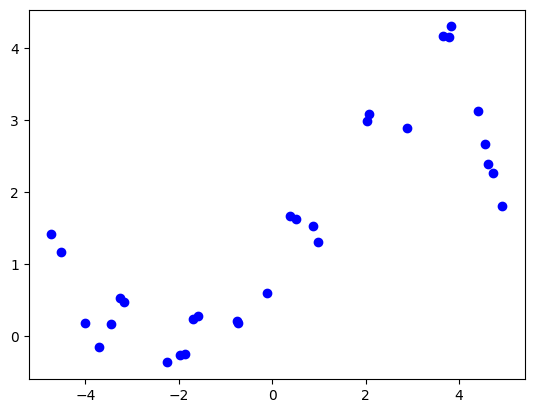

In [ ]:
# punkty nie są rozłożone równomiernie i nie znamy "prawdziwej" funkcji, która za nimi stoi
X2 = np.array([-4.73, -4.52, -4., -3.7, -3.45, -3.26, -3.17, -2.24, -1.98, -1.86, -1.7, -1.59, -0.75, -0.73, -0.12, 0.38,
              0.5, 0.88, 0.98, 2.03, 2.08, 2.88, 3.66, 3.78, 3.82, 4.4, 4.55, 4.61, 4.72, 4.92])
Y2 = np.array([1.42, 1.16, 0.18, -0.16, 0.16, 0.52, 0.47, -0.37, -0.27, -0.25, 0.23, 0.27, 0.2, 0.18, 0.6, 1.66, 1.63,
              1.53, 1.3, 2.98,3.08,  2.89,  4.17,  4.15,  4.3, 3.12, 2.66, 2.39, 2.27, 1.8 ])

# zobaczmy sobie, jak wyglądają:
plt.plot(X2,Y2, "bo")

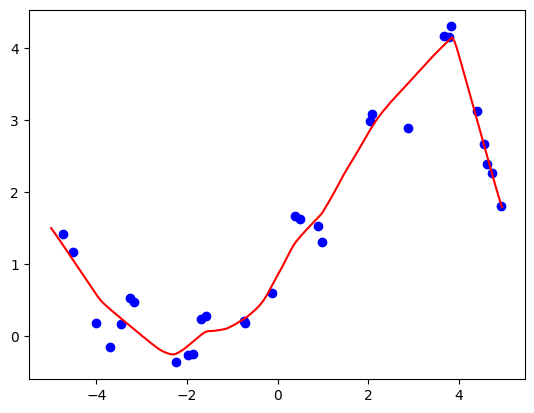

In [ ]:
# stwórzmy sieć, która ma za zadanie dokonać aproksymacji:
network2 = MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter = 5000, tol = 0.001, activation = 'relu')
network2.fit(X2.reshape(-1,1), Y2)
X2_space = np.arange(-5., 5., 0.05)
Y2_predicted = network2.predict(X2_space.reshape(-1,1))

# zobaczmy, jak wygląda funkcja aproksymująca:
plt.plot(X2,Y2, "bo")
plt.plot(X2_space, Y2_predicted, "r")
plt.show()

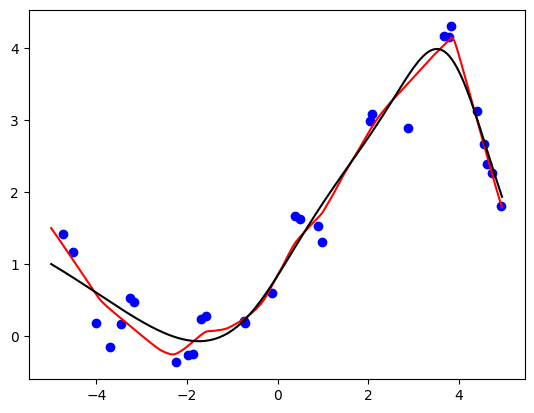

In [ ]:
# co by się stało, gdybyśmy spróbowali innej funkcji aktywacji?
network3 = MLPRegressor(solver='adam',hidden_layer_sizes=(100, 100, 100, 100, 100), max_iter = 5000, tol = 0.001, activation = 'tanh')
network3.fit(X2.reshape(-1,1), Y2)
Y3_predicted = network3.predict(X2_space.reshape(-1,1))

# wyrysujmy to, otrzymaliśmy z obu sieci, na jednym wykresie
plt.plot(X2,Y2, "bo")
plt.plot(X2_space, Y2_predicted, "r")
plt.plot(X2_space, Y3_predicted, "k")
plt.show()

### Jak oceniamy poprawność dopasowania?

Wiemy, że do określenia jakości dopasowania używamy błędu średniokwadratowego, definiowanego jako:

$MSE = \Sigma_i^N (y^i_{true}-y^i_{predicted})^2$

MSE pozwala przede wszystkim porównać między sobą dwie metody aproksymacji. Minimalny wynik osiągnięty przy używaniu $MSE$ to 0, co znaczy, że funkcja aproksymująca przechodzi przez każdy punkt. W sklearn możemy go łatwo policzyć za pomocą funkcji metrics.mean_squared_error

Wartością pochodną od MSE jest **błąd pierwiastkowy średniokwadratowy (RMSE)**, definiowany jako:

$
RMSE = \sqrt{MSE}
$

RMSE posiada tę samą jednostkę co wartości oryginalne, co ułatwia interpretację błędu w kontekście danych wejściowych. W `sklearn` można go obliczyć jako:
```python
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
```

Inną popularną miarą jakości dopasowania w problemach regresyjnych jest **średni procentowy błąd bezwzględny (MAPE – Mean Absolute Percentage Error)**, definiowany jako:

$
MAPE = \frac{100\%}{N} \sum_{i=1}^{N} \left| \frac{y^{(i)}_{\text{true}} - y^{(i)}_{\text{predicted}}}{y^{(i)}_{\text{true}}} \right|
$

MAPE wyraża błąd jako procent wartości rzeczywistej, dzięki czemu łatwiej porównać jakość dopasowania modeli na danych o różnej skali. Minimalna wartość MAPE to 0% – oznacza to idealne dopasowanie.

Należy jednak uważać, ponieważ MAPE jest wrażliwy na obecność wartości bliskich zeru w zbiorze danych – dzielenie przez bardzo małe liczby może prowadzić do dużych błędów względnych lub błędów obliczeniowych.

W `sklearn` MAPE można obliczyć za pomocą funkcji `mean_absolute_percentage_error`:


Wywołanie metody score( ) dla MLPRegressor używa tzw. **współczynnika determinacji $R^2$**, który liczymy w następujący sposób:

$1 - \frac{\Sigma_i^N (y^i_{true}-y^i_{predicted})^2}{\Sigma_i^N (y^i_{true}-y_{mean})^2}$

Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.score

Najlepszy wynik osiągnięty przy używaniu współczynnika determinacji to 1, kiedy wszystkie badane punkty leżą na funkcji, jednak musimy pamiętać o tym, że nie zawsze chcemy dojść do takiej sytuacji kosztem tego, co dzieje się pomiędzy punktami (dlatego weryfikacja dla zbioru testującego jest taka ważna!)

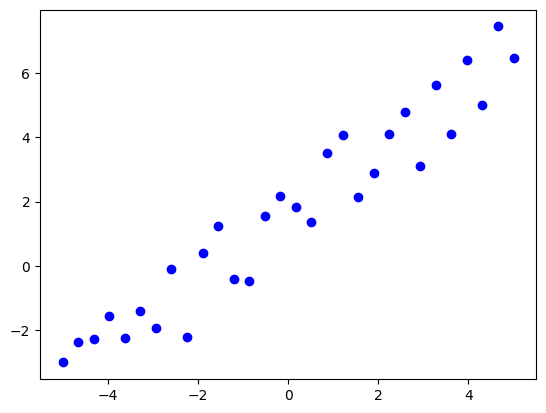

In [ ]:
# stwórzmy zaszumione dane:
X_noise = np.linspace(-5.,5.,30)
Y_noise = X_noise + 3*np.random.rand(30)
plt.plot(X_noise, Y_noise, "bo")

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# stwórzmy dwie sieci: jedną prostszą, drugą bardziej skomplikowaną
network_noise1 = MLPRegressor(solver='adam',hidden_layer_sizes=(20,20), max_iter = 1000, tol = 0.001, activation = 'relu')
network_noise1.fit(X_noise.reshape(-1,1), Y_noise)

network_noise2 = MLPRegressor(solver='adam',hidden_layer_sizes=(2000,2000,2000,2000,2000), max_iter = 1000, tol = 0.001, activation = 'relu')
network_noise2.fit(X_noise.reshape(-1,1), Y_noise)

# dokonajmy predykcji, żeby móc później narysować sieci
predict_noise1 = network_noise1.predict(X_noise.reshape(-1,1))
predict_noise2 = network_noise2.predict(X_noise.reshape(-1,1))

Network 1 R^2 score : 0.916729
Network 2 R^2 score : 0.959809
Network 1 MSE score : 0.754551
Network 2 MSE score : 0.364191


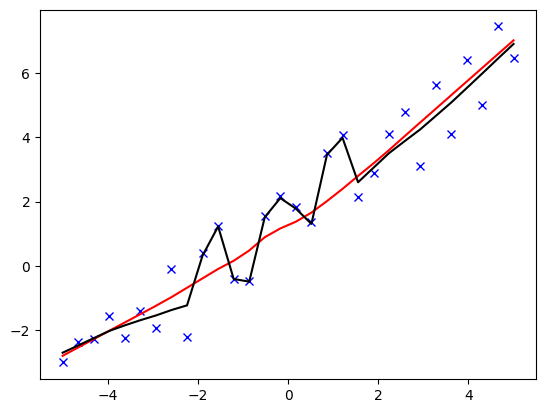

In [ ]:
# wypiszmy R^2 predykcji obu sieci:
print("Network 1 R^2 score : %f\nNetwork 2 R^2 score : %f" % (network_noise1.score(X_noise.reshape(-1,1), Y_noise), network_noise2.score(X_noise.reshape(-1,1), Y_noise)))
print("Network 1 MSE score : %f\nNetwork 2 MSE score : %f" % (mean_squared_error(Y_noise, predict_noise1), mean_squared_error(Y_noise, predict_noise2)))

# narysujmy obie sieci na jednym wykresie razem z punktami:
plt.plot(X_noise,Y_noise,"bx")
plt.plot(X_noise,predict_noise1,"r")
plt.plot(X_noise,predict_noise2,"k")

Sieć 2 otrzymała (oczywiście) lepszy wynik (w wypadku MSE prawie 2 razy!), jednak pytanie, czy nie dlatego, bo dopasowała się do losowych szumów obecnych w w danych. Kolejne pytanie: czy stosunkowo niewielka poprawa dopasowania była warta robienia setki razy większej sieci (nie zawsze mamy odpowiednio duże zasoby obliczeniowe dla dużych sieci)?

## Zadania do samodzielnego wykonania

1.

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję $Z(w_{TV}, w_{radio}, w_{prasa})$. Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące i o pilnowaniu skali danych.

2.

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji $f(x) = sin(x)$ w przedziale $[-2\pi,2\pi]$. Proszę użyć $tanh$ jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

3.


Proszę o wykorzystanie rzeczywistego zbioru danych medycznych (`diabetes`) z biblioteki `sklearn.datasets` (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html), w którym celem jest przewidywanie stopnia zaawansowania choroby cukrzycowej na podstawie zestawu cech opisujących pacjenta. Proszę przeskalować dane do jednej skali i podzielić je na dane uczące i testujące. Proszę zaproponować co najmniej 5 różnych architektur sieci neuronowych, dla każdej z nich policzyć wyniki za pomocą MSE, MAPE i R^2. Dla najlepszego modelu proszę wykonać wykres porównujący wartości rzeczywiste (na osi X) i przewidywane (na osi Y). W idealnym przypadku powinny ułożyć się na prostej y=x.

Proszę skomentować, jak architektura sieci wpływa na aproksymację i zaproponować najmniejszą sieć, dla której wyniki są dla państwa zadowalające.

4.

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz dwóch wybranych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

___________________________________
## Zadania dla chętnych

5*.

Można spróbować (już po normalizacji) zmniejszyć wymiarowość zbioru diabetes. Żeby to osiągnąć, opcją jest np. odrzucić pierwsze dwie kolumny, albo dokonać zmniejszenia wymiarowości powszechnie używanym algorytmem PCA (https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, w dokumentacji są przykłady użycia). Wtedy można zbadać jak zmieni się działanie sieci po takim zabiegu.


___________________________________

## Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html